* Ade Ripaldi Nuralim
* 1227050003
* Praktikum D

# klasifikasi Model Decision Tree untuk memprediksi apakah seseorang layak mendapatkan kredit komputer atau tidak berdasarkan data karakteristik seperti usia, penghasilan, status mahasiswa, dan rating kredit.

Dataset : [teks link](https://drive.google.com/file/d/1krLRWedghy_ysJ2N6i-1GJ-ZQUmnu6eu/view)

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# **2. Load Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [4]:
  # Mount Google Drive
  drive.mount('/content/drive', force_remount=True)

  # Load dataset
  dataset_path = "/content/drive/MyDrive/mesin/uts_prakmesin/dataset_buys _comp.csv"
  df = pd.read_csv(dataset_path)

Mounted at /content/drive


In [6]:
df.head()

,Age,Income,Student,Credit_Rating,Buys_Computer
0,Tua,Tinggi,Ya,Buruk,0
1,Paruh Baya,Tinggi,Ya,Baik,1
2,Paruh Baya,Rendah,Tidak,Buruk,1
3,Tua,Rendah,Tidak,Baik,1
4,Tua,Rendah,Ya,Baik,1


# 3. Preprocessing Data

Cek Null

In [8]:
print(df.isnull().sum())


Age              0
Income           0
Student          0
Credit_Rating    0
Buys_Computer    0
dtype: int64


Encode

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le


Pisahkan fitur dan label

In [14]:
X = df.drop("Buys_Computer", axis=1)
y = df["Buys_Computer"]


# 4.Split Dataset

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 5.Membangun Model

# Decision Tree


In [16]:
model = DecisionTreeClassifier(criterion="entropy", random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

# 6. Evaluate Model

Akurasi: 0.805
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.80      0.75        71
           1       0.88      0.81      0.84       129

    accuracy                           0.81       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.82      0.81      0.81       200

Confusion Matrix:
 [[ 57  14]
 [ 25 104]]


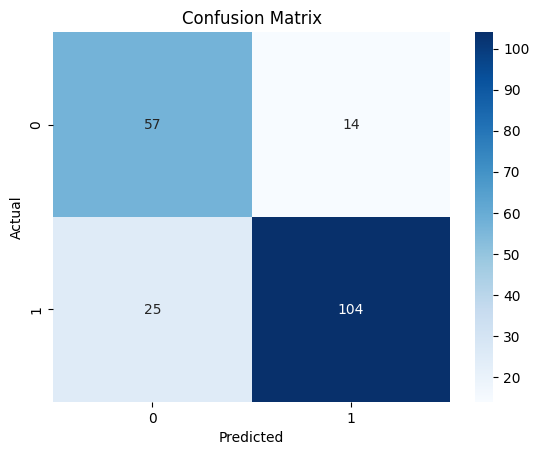

In [17]:
y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualisasi Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# 7. Visualisasi

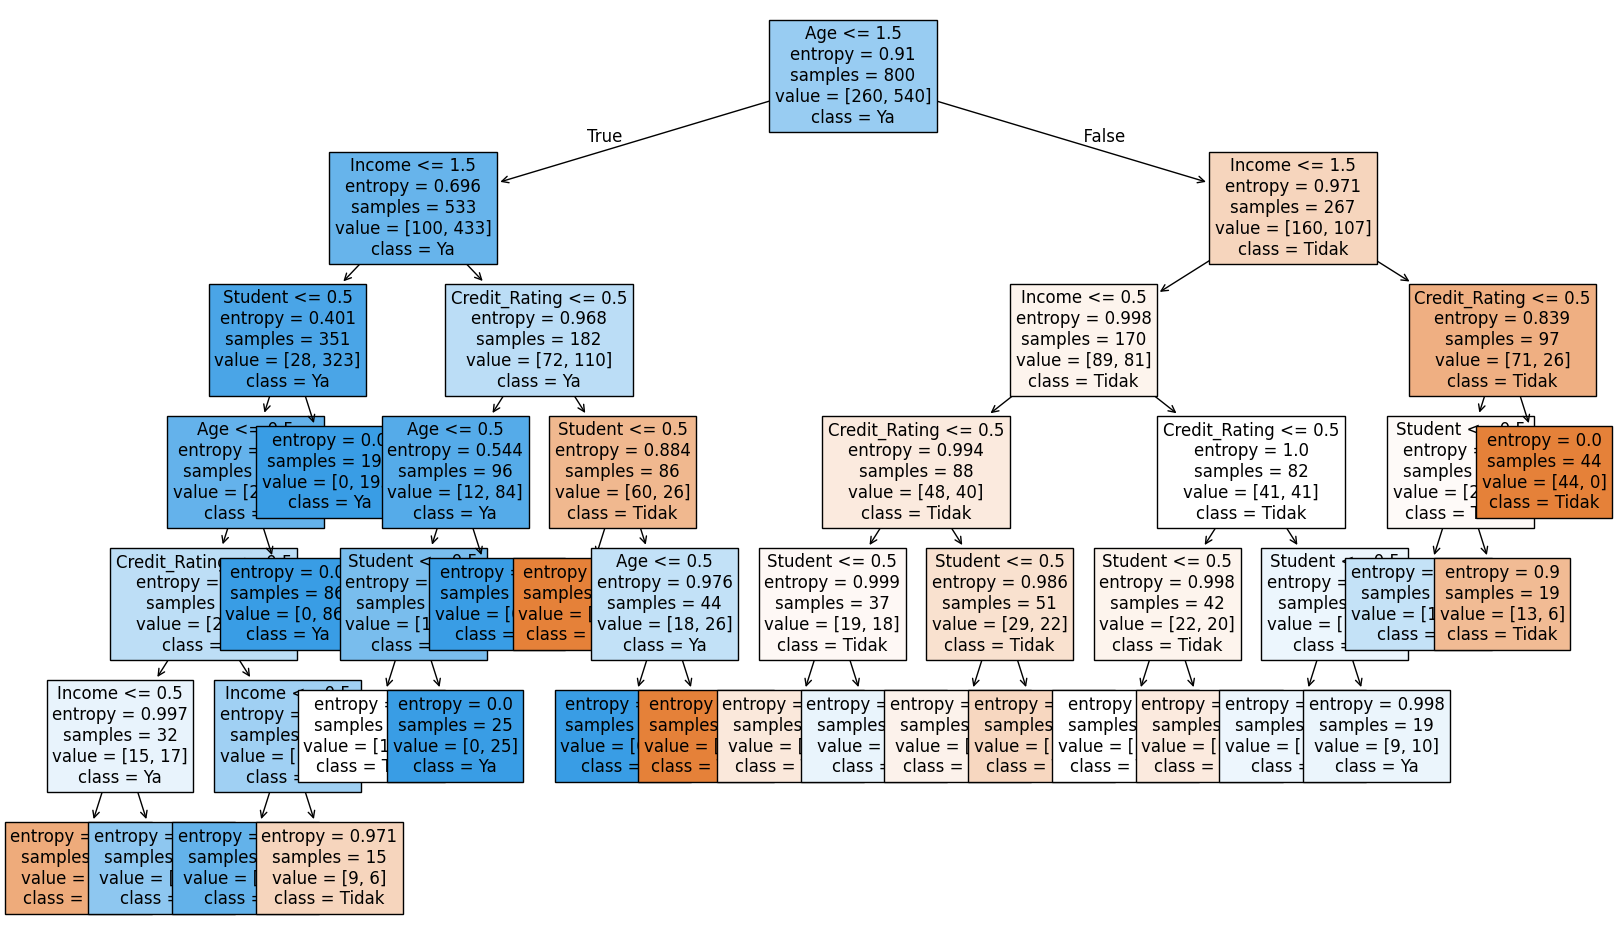

In [22]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,12))
plot_tree(model,
          feature_names=X.columns,
          class_names=["Tidak", "Ya"],
          filled=True,
          fontsize=12)
plt.show()



# Implementasi / Interface prediksi

In [41]:
data1 = pd.DataFrame({
    'Age': ['Paruh Baya'],
    'Income': ['Tinggi'],
    'Student': ['Ya'],
    'Credit_Rating': ['Baik']
})

for col in data1.columns:
    data1[col] = label_encoders[col].transform(data1[col])

pred = model.predict(data1)
print("Prediksi :", "Layak" if pred[0] == 1 else "Tidak Layak")


Prediksi : Layak


In [39]:
data2 = pd.DataFrame({
    'Age': ['Tua'],
    'Income': ['Rendah'],
    'Student': ['Tidak'],
    'Credit_Rating': ['Buruk']
})

for col in data2.columns:
    data2[col] = label_encoders[col].transform(data2[col])

pred = model.predict(data2)
print("Prediksi :", "Layak" if pred[0] == 1 else "Tidak Layak")


Prediksi : Tidak Layak


In [40]:
data3 = pd.DataFrame({
    'Age': ['Muda'],
    'Income': ['Tinggi'],
    'Student': ['Tidak'],
    'Credit_Rating': ['Buruk']
})

for col in data3.columns:
    data3[col] = label_encoders[col].transform(data3[col])

# Prediksi kelas
prediksi = model.predict(data3)[0]
hasil = "Layak" if prediksi == 1 else "Tidak Layak"

# Skor probabilitas
proba = model.predict_proba(data3)[0]

print(f"Hasil Prediksi: {hasil}")
print(f"Probabilitas Tidak Layak (0): {proba[0]:.2f}")
print(f"Probabilitas Layak (1): {proba[1]:.2f}")


Hasil Prediksi: Tidak Layak
Probabilitas Tidak Layak (0): 1.00
Probabilitas Layak (1): 0.00


## **e. Analisis Hasil Evaluasi dan kesimpulan Model Decision Tree**

Analisis Hasil Evaluasi:

Model Decision Tree dengan criterion "entropy" berhasil mencapai akurasi sebesar 80.5% pada data uji, yang menunjukkan kinerja cukup baik dalam mengklasifikasikan data.

* Dari classification report, terlihat bahwa kelas:

    * "Tidak Layak" (0) memiliki precision 0.70 dan recall 0.80.

    * "Layak" (1) memiliki precision yang lebih tinggi yaitu 0.88, dengan recall 0.81.

* Confusion Matrix menunjukkan:

    * 57 prediksi benar untuk kelas "Tidak Layak", dan 104 prediksi benar untuk kelas "Layak".

    * 14 kasus kelas "Tidak Layak" diprediksi salah sebagai "Layak", dan 25 kasus "Layak" diprediksi salah sebagai "Tidak Layak".

* Saat dilakukan prediksi terhadap data baru (data3), hasil prediksi adalah "Tidak Layak" dengan probabilitas 1.00. Ini menunjukkan bahwa model sangat yakin pada prediksinya, kemungkinan besar karena pola seperti itu pernah ditemui di data latih atau merupakan hasil dari pemangkasan cabang decision tree yang terlalu spesifik (overfitting).